# KNN（K近邻）
> 在训练集中找寻距离测试样本最近的K个样本。通过统计这K个样本的类别，来判断测试样本的类别

In [1]:
# 导入相关包
import numpy as np
import matplotlib.pyplot as plt
import operator
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
# trainData ：训练集[N, D] 
# testData : 测试 [1, D] 
# labels : 训练集标签
# k : 临近点的个数
def knn(trainData, testData, labels, k):
    # 计算训练样本的行数
    N, D = np.shape(trainData)
    # 计算训练样本的差值
    diff = np.tile(testData, (N, 1)) - trainData
    # 计算差值的平方和
    sqrtDiff = diff ** 2
    sqrtDiffsum = sqrtDiff.sum(axis = 1)
    # 计算距离
    distances = sqrtDiffsum ** 0.5 
    # 排序
    sortDistance = distances.argsort()

    count = {}
    for i in range(k):
        vote = labels[sortDistance[i]]
        count[vote] = count.get(vote, 0) + 1
    sortCount = sorted(count.items(), key=operator.itemgetter(1), reverse=True)

    return sortCount[0][0]

In [3]:
# KNN 训练
def knn_train(train, tests, labels, k):
    pre = np.zeros(tests.shape[0])
    for idx, test in enumerate(tests):
        pre[idx] = knn(train, test, labels, k)
    return pre

In [4]:
from sklearn.datasets import make_circles
from sklearn.model_selection  import train_test_split

# 生成环形数据
X, y = make_circles(n_samples = 1000, factor = 0.5, noise = 0.1)

# 数据分离
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [5]:
# 绘图
def draw_test(datasets, labs, dic_colors = None, name = ''): 
    plt.cla()

    n_lab = set(labs.tolist())
    for i, val in enumerate(n_lab): 
        index = np.where( labs == val )[0]
        sub_dataset = datasets[index, : ]
        plt.scatter(sub_dataset[:, 0], sub_dataset[:, 1], s=16.,color = dic_colors[i])
    plt.title(name)
    plt.show()

dic_colors = ['r', 'g', 'b']

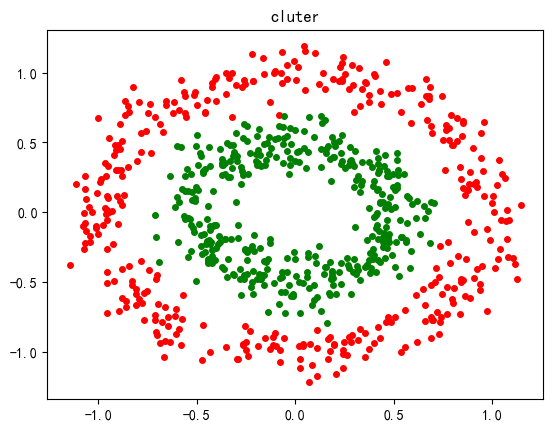

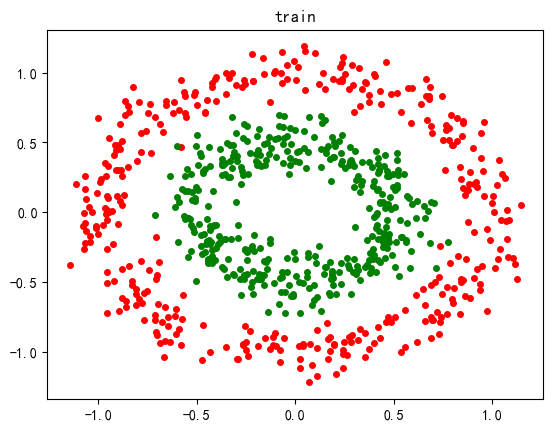

In [6]:
# KNN训练环形数据
# 对环形数据训练
k = 5
y_pre = knn_train(X_train, X_test, y_train, k = k) 
draw_test(X_test, y_pre, dic_colors,'cluter')
draw_test(X_test, y_test, dic_colors, 'train')